# Introduction to Bayesian Data Analysis - Applied Version


<img src="results\figures\presentation\1.png" width="500" height="500" align="center"/>


### Valerio Bonometti                                                                                    
**PhD Candidate University of York**  
**Workshop Repository:** https://github.com/vb690/introduction_bayesian_analysis

## Agenda

* Introduction
 
* Bayesian Approach to Inference

    * Counts
    * Updating Counts
    * From Counts to Probability
    * Likelihood, Parameters, Prior and Posterior 
    * Parameters Estimation
    * Bayesian Models
    
* PyMC3
    
    * Model Building 
    * Model Inspecting
    * Model Fitting
    * Model Evaluating and Comparing
    * Model Predicting
    
* Applications
    
    * PyMC3 vs scikit-learn
    * Web Traffic Estimation
    * Advertising Effect on Revenue
    * Game Difficulty Estimation
    * Model Comparison

## Introduction

### Introduction - Books

* [Statistical Rethinking 1st Edition (Chapters: 2, 3 and 4)](https://xcelab.net/rm/statistical-rethinking/)
* [Bayesian Data Analysis](http://www.stat.columbia.edu/~gelman/book/)
* Edwin Thompson Jayne

### Introduction -  Online Material

* [Statistical Rethinking using PyMC3](https://github.com/pymc-devs/resources/tree/master/Rethinking_2)
* PyMC3 [tutorials](https://docs.pymc.io/nb_tutorials/index.html) and [learning materials](https://docs.pymc.io/learn.html)

### Introduction -  Libraries

* Core (Sections 1, 2)
    * Numpy
    * Scipy
    * Matplolib 

* Extended (Section 3)
     * PyMC3
     * Theano (can be painful on Windows)
     * Seaborn

In [1]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm

import numpy as np
from scipy.stats import binom, beta, norm

from sklearn.datasets import make_regression

import pymc3 as pm

import matplotlib.pyplot as plt
import seaborn as sns

## Bayesian Approach to Inference

### *Bayesian approach to inference is all about computing plausibility of hypothesis given prior beliefs and data*

### Bayesian Approach to Inference - Counts


| Number of Reviews | Number of Outcomes | Reviews Outcomes |
| --- | --- | --- |
| 4 | 3 | Good, Bad, Good |


#### <center> What is the proportion of good reviews ? <center>

<br/>

| HYPOTHESIS | NUMBER OF WAYS [Good, Bad, Good] CAN APPEAR |
| --- | --- |
| 0.0 | 0 |
| 0.25 | 3 |
| 0.50 | 8 |
| **0.75** | **9**|
| 1.0 | 0 |
    
See [Gelman and Loken](http://www.stat.columbia.edu/~gelman/research/unpublished/p_hacking.pdf)

### Bayesian Approach to Inference - Updating Counts

#### <center> A new review is observed and it is Bad <center>


| HYPOTHESIS | PRIOR BELIEF| NUMBER OF WAYS [Bad] CAN APPEAR |  WAYS X PRIOR|
| --- | --- | --- | --- |
| 0.0 | 0 | 4 | 0 |
| 0.25 | 3 | 3 | 9 |
| **0.50** | **8** | **2** | **16** |
| 0.75 | 9| 1 | 9 |
| 1.0 | 0 | 0 | 0 |

### Bayesian Approach to Inference - From Counts to Probability

<br/>
<br/>

<center> $Posterior = \frac{Likelihood \times Prior}{Average \, Likelihood}$  <center>

<br/>
<br/>
    
<center> $Pr(Parameter |  Data) = \frac{Pr(Data | Parameter) \times Pr(Parameter)}{Pr(Data)}$ <center>
    
<br/>
<br/>

<center> $Pr(Hypothesis |  Reviews \, Outcomes) = \frac{WAYS \times PRIOR}{Normalizing}$ <center>
    
<br/>
<br/>

<center> $Pr(0.50 | Bad) = \frac{2 \times 8}{34}$ <center>


### Bayesian Approach to Inference - From Counts to Probability

| HYPOTHESIS | PRIOR BELIEF| NUMBER OF WAYS [Bad] CAN APPEAR |  $\frac{WAYS \times PRIOR}{Normalizing}$|
| --- | --- | --- | --- |
| 0.0 | 0 | 4 | 0 |
| 0.25 | 3 | 3 | 0.26 |
| 0.50 | 8 | 2 | 0.47 |
| 0.75 | 9| 1 | 0.26 |
| 1.0 | 0 | 0 | 0 |

<img src="results\figures\presentation\applied\1.png" width="400" height="400" align="center"/>

C:\Users\penthotal\miniconda3\envs\workshop_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


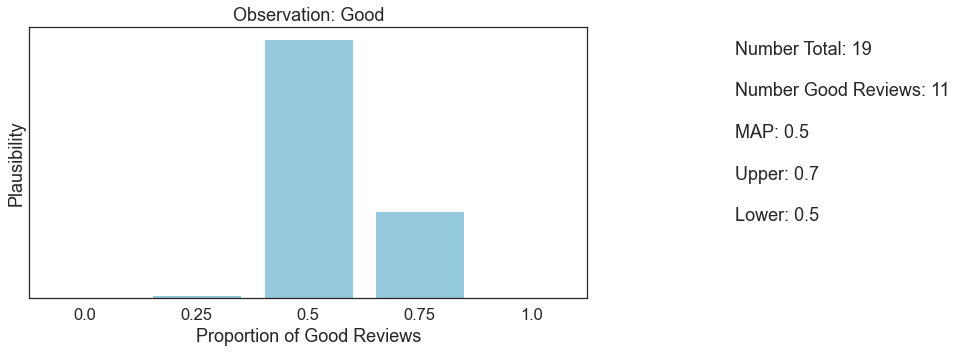

In [2]:
from modules.visuals import visualize_binomial_update

visualize_binomial_update(
    n_tests=20, 
    parameter_name='Good Reviews',
    remapper={0: 'Bad', 1: 'Good'},
    parameter_space=np.linspace(0, 1, 5),
    figsize=(10, 5),
    hist=True,
    auto=True,
    color='skyblue'
)

### Bayesian Approach to Inference - Likelihood, Parameters, Prior, Posterior

<br/>
<br/>

<center> $Posterior = \frac{Likelihood \times Prior}{Average \, Likelihood}$  <center>

#### Likelihood is a function explaining the plausibility of data given a data-generating process

Plausibility of observing **333** good reviews out of **656** total **assuming** a proportion of good reviews of **0.5**?

<center> $Observed\, Good\, Reviews \sim B(Total\, Reviews, Proportion)$  <center>
<center> $333 \sim B(656, 0.5)$  <center>

<center>$Pr(Good | Total, Proportion)$ = $PMF(Good)$ given $B(Total, Proportion)$  <center>
<center>$Pr(333 | 656, 0.5)$ = $PMF(333)$ given $B(656, 0.5)$  <center>

#### Likelihood function are defined by parameters, which are hypothesis on the data-generating process.

How the plausibility of observing **333** good reviews out of **656** total **varies** assuming proportion of good reviews that consider all the values going from **0.0** to **1.0**?

<center> $Pr(333 | 656, 0.0)$  <center>
<center> $Pr(333 | 656, 0.1)$  <center>
<center> $Pr(333 | 656, 0.2)$  <center>
<center> ...  <center>

<img src="results\figures\presentation\applied\2.png" width="400" height="400" align="center"/>

#### Prior is the initial set of plausibility that each value of the paramter to estimate can assume

Without seeing any data I can assume that there is **nearly zero** plausibility that the proportion of good reviews is **0.0** or **1.0**

$Beta(\alpha, \beta)$

<img src="results\figures\presentation\applied\3.png" width="500" height="500" align="center"/>

#### Posterior is the relatively plausibility of the parameters to estimate conditioned on the observed data
After seeing some data I update my prior. Now it is more plausibile that the proportion of Good reviews is close to 1.0

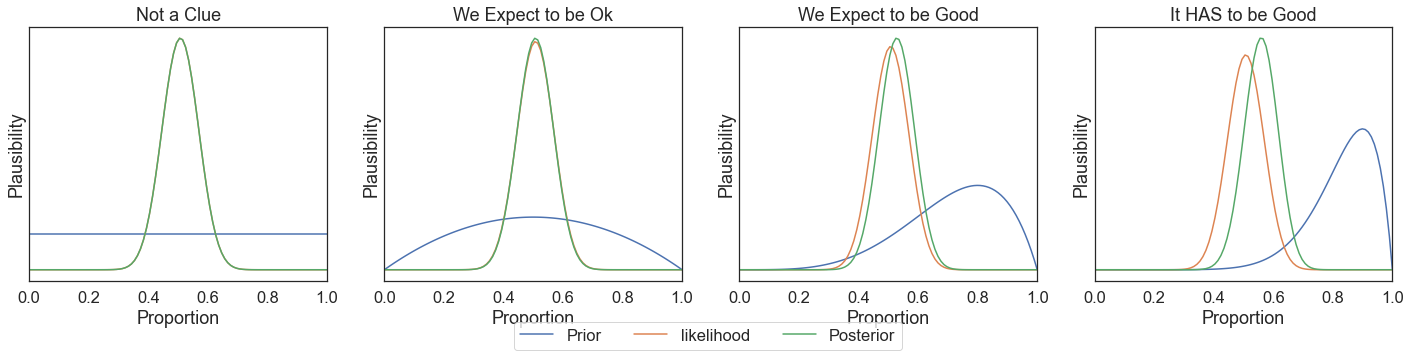

In [3]:
from modules.visuals import visualize_priors_effect

TOTAL_REVIEWS = 65
GOOD_REVIEWS = 33

PARAMETER_SPACE = np.linspace(0, 1, 100)
PRIORS = {
    'Not a Clue': np.array([1] * len(PARAMETER_SPACE)),
    'We Expect to be Ok': beta(2, 2).pdf(PARAMETER_SPACE),
    'We Expect to be Good': beta(5, 2).pdf(PARAMETER_SPACE),
    'It HAS to be Good': beta(10, 2).pdf(PARAMETER_SPACE),
}

visualize_priors_effect(
    parameter_space=PARAMETER_SPACE,
    priors=PRIORS,
    likelihood=binom.pmf(GOOD_REVIEWS, TOTAL_REVIEWS, p=PARAMETER_SPACE),
    figsize=(20, 5)
)

### Bayesian Approach to Inference - Parameters Estimation


#### Prior, Likelihood and Posterior are all components aimed to do one thing: 
   
#### Define a model for a data generation process and estimate the plausibility of all the values the parameters of the model can assume, not just finding the most probable one.

### Bayesian Approach to Inference - Models 

A Western traveler asks an Oriental philosopher to describe the nature of the world:  
  
“It is a great ball resting on the flat back of the world turtle.”  
“Ah yes, but what does the world turtle stand on?”  
“On the back of a still larger turtle.”  
“Yes, but what does he stand on?”  
“A very perceptive question. But it’s no use, mister; it’s turtles all the way down.”

<br/>

<img src="results\figures\presentation\6.jpg" width="300" height="300" align="center"/>

<br/>

### Bayesian Approach to Inference -  Parameters and Distributions all the Way Down

<br/>

#### <center> What is the proportion of good reviews <center>

<br/>

<center> $outcome \sim Binomial(n, p)$ <center>
<center> $p \sim Beta(\alpha, \beta)$ <center>

<br/>

<img src="results\figures\presentation\8.png" width="200" height="200" align="center"/> 

### Bayesian Approach to Inference - Parameters and Distributions all the Way Down

<br />
<center> $outcome \sim Binomial(n, p)$ <center>
<center> $p \sim Beta(\alpha, \beta)$ <center>
<center> $\alpha \sim HalfNormal(\sigma_\alpha)$ <center>
<center> $\beta \sim HalfNormal(\sigma_\beta)$ <center>
<br />
<img src="results\figures\presentation\9.png" width="300" height="300" align="center"/> 

## PyMC3

### High level framework:

### 1. Bayesian modelling and probabilistic machine learning 
### 2. Built on top of Theano
### 3. Computational graphs and fast(er) inferecne

### PyMC3 - Model Building
#### <center> What is the proportion of good reviews after observing 333 of them out of 656 total ?<center>

<center> $good\, reviews \sim Binomial(total\, reviews, proportion)$ <center>
<center> $proportion \sim Beta(\alpha, \beta)$ <center>

```python
TOTAL_REVIEWS = 656
GOOD_REVIEWS = 333

with pm.Model() as p_esitmation_model:
    
    # prior distribution of the paramter to estimate
    theta = pm.Beta(
        alpha=2,
        beta=2,
        name='parameter_p'
    )
```
```python
    # the outocme distribution
    outcome = pm.Binomial(
        p=theta,
        observed=GOOD_REVIEWS,
        n=TOTAL_REVIEWS,
        name='outcome'
    )
```

### PyMC3 - Model Building
#### <center> What is the number of total reviews and the proportion of good reviews after observing 333 of them?<center>

<center> $good\, reviews \sim Binomial(total\, reviews, proportion)$ <center>
<center> $proportion \sim Beta(\alpha, \beta)$ <center>
<center> $total\, reviews \sim Poisson(\lambda)$ <center>    

In [4]:
GOOD_REVIEWS = np.random.binomial(666, 0.52, 100)

def build_model(observed):
    """
    Function for building a PyMC3 model
    
    Arguments:
        observed: value or array of values, data to fit the model on
    
    Returns:
        estimation_model: A PyMC3 model
    """
    with pm.Model() as esitmation_model:

        # prior distribution of the paramter to estimate
        p = pm.Beta(
            alpha=3,
            beta=3,
            name='proportion'
        )

        # prior distribution of the paramter to estimate
        n = pm.Poisson(
            mu=666,
            name='total reviews'
        )

        # the outocme distribution
        outcome = pm.Binomial(
            p=p,
            observed=GOOD_REVIEWS,
            n=n,
            name='good reviews'
        )
    
    return esitmation_model

### PyMC3 - Model Inspecting

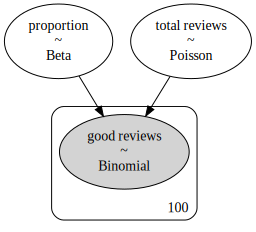

In [5]:
with build_model(GOOD_REVIEWS):
    
    graph  = pm.model_graph.model_to_graphviz()

graph

### PyMC3 - Model Inspecting

In [6]:
with build_model(GOOD_REVIEWS):
    
    prior_checks = pm.sample_prior_predictive(
        samples=1000
    )

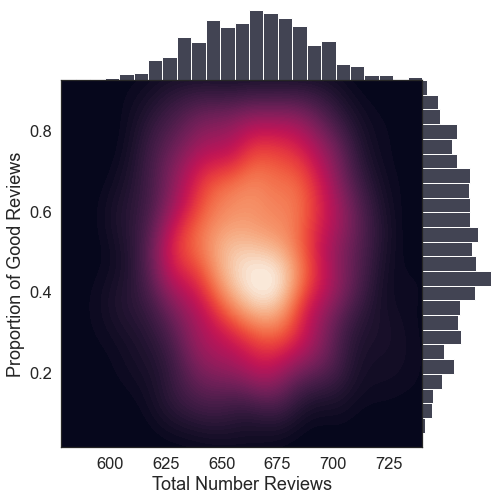

In [7]:
from modules.visuals import visualize_bivariate_parameter_grid

visualize_bivariate_parameter_grid(
    parameter_1=prior_checks['total reviews'], 
    parameter_2=prior_checks['proportion'],
    parameter_1_name='Total Number Reviews', 
    parameter_2_name='Proportion of Good Reviews',
    height=7
)

### PyMC3 - Model Fitting

In [8]:
with build_model(GOOD_REVIEWS):
    
    # find the posterior distribution using MCMC 
    train_traces = pm.sample(
        draws=2000,
        chains=2,
        tune=1000,
        cores=1
    )

Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [proportion]
>Metropolis: [total reviews]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 5 seconds.
There were 227 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.22065557207571954, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


### PyMC3 - Model Evaluating

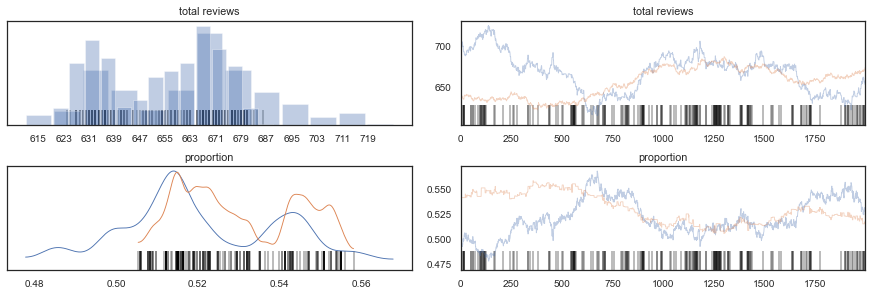

In [9]:
with build_model(GOOD_REVIEWS):
        
    # sample from the posterior distribution of the parameters
    posterior_checks = pm.sample_posterior_predictive(
        train_traces,
        var_names=['total reviews', 'proportion', 'good reviews']
    )
    
    pm.plot_trace(train_traces)

### PyMC3 - Model Evaluating

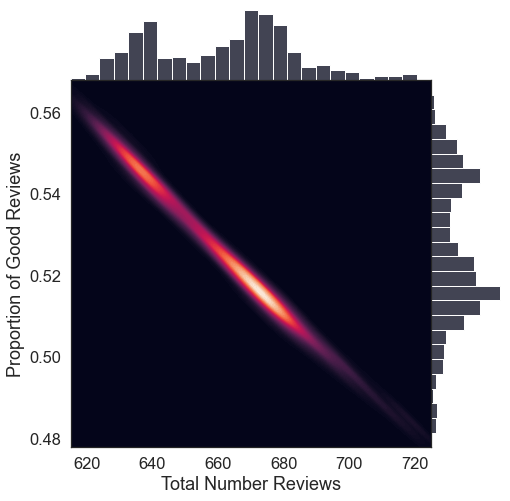

                  mean      sd   hdi_3%  hdi_97%  r_hat
total reviews  661.328  21.650  624.000  697.000   1.21
proportion       0.526   0.017    0.498    0.556   1.21


In [10]:
with build_model(GOOD_REVIEWS):
    
    # visualize the posterior distribution
    visualize_bivariate_parameter_grid(
        parameter_1=posterior_checks['total reviews'], 
        parameter_2=posterior_checks['proportion'],
        parameter_1_name='Total Number Reviews', 
        parameter_2_name='Proportion of Good Reviews',
        height=7
    )
    
    print(pm.summary(train_traces)[['mean', 'sd', 'hdi_3%', 'hdi_97%', 'r_hat']])

### PyMC3 - Model Predicting

C:\Users\penthotal\miniconda3\envs\workshop_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


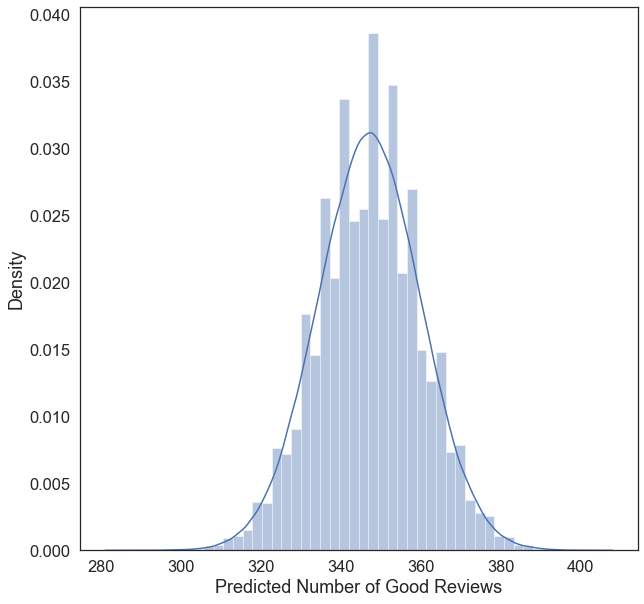

In [11]:
plt.figure(figsize=(10, 10))
sns.distplot(posterior_checks['good reviews'])
plt.xlabel('Predicted Number of Good Reviews')
plt.show()

## Applied Examples

### Applied Examples - PyMC3 vs scikit-learn

### <center> Which one is best? </center>

### <center> It depends! </center>

<center>

|   **PyMC3 - Framework**    | **scikit-learn - Toolbox** |
|:-------------: |:----------------:|
|    Flexible    |    Constrained   |
|   Modelling / Analysis  | Machine-learning |
|   White-box    |     Grey-box     |
| Non-smooth API  |    Smooth API    |
| In theory works on GCP  |    Built for GCP    |
| More Thinking  |   Less Thinking  |
| More Tinkering |   Less Tinkering |
| More Thinking  |   Less Thinking  |
| More Control   |   Less Control   |
| More Insights  |   Less Insights  |

</center>

### Applied Examples - scikit-learn Bayesian Ridge Regression

In [12]:
# sklearn will do "bayesian" fitting 
# but will return point estimate for the parameters
from sklearn.linear_model import BayesianRidge

ridge_model = BayesianRidge(
    alpha_1=0.01, # prior Gamma
    alpha_2=0.01, # prior Gamma
    lambda_1=0.01, # prior Gamma
    lambda_2=0.01 # prior Gamma
)

### Applied Examples - PyMC3 Bayesian Ridge Regression

In [13]:
# PyMC3 will return distribution for the parameters
with pm.Model() as ridge_model:
    # I decide that my intercpet comes from a normal distribution
    intercept = pm.Normal(
        'Intercept',
        mu=0.,
        sigma=1.
    )
    # I decide which type of prior I want to put on the slope
    slope_sigma = pm.Gamma(
        'Slope Sigma',
        alpha=0.01,
        beta=0.01
    )
    slope = pm.Normal(
        'Slope',
        mu=0,
        sd=slope_sigma ,
    )
    mu = intercept + slope*X
    sigma = pm.HalfCauchy(
        'sigma',
        beta=10.
    )
    # I decide that my outcome is normally distributed
    outcome = pm.Normal(
        'y',
        mu=mu,
        sd=sigma,
        observed=y
    )

NameError: name 'X' is not defined

### Applied Examples - Impact of Advertising Spending on Net Revenue

In [12]:
from modules.visuals import visualize_bivariate_relationship

X, y, coef = make_regression(
    n_samples=100,
    n_features=1,
    bias=200,
    noise=50,
    coef=True,
    random_state=56
)
X = (X - X.mean()) / X.std()
X = X.flatten()

Real Coefficient 12.04988641563446


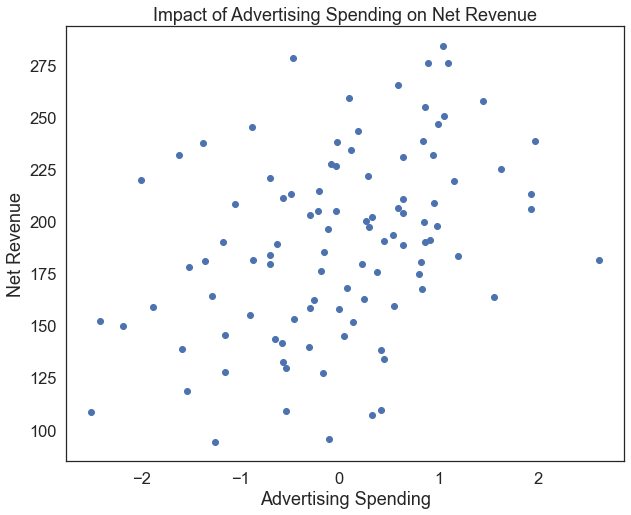

In [15]:
print(f'Real Coefficient {coef}')
visualize_bivariate_relationship(
    X=X,
    y=y,
    X_label='Advertising Spending',
    y_label='Net Revenue',
    title=f'Impact of Advertising Spending on Net Revenue',
)

<center> $y_i \sim N(\mu_i, \sigma)$ <center>
    
<center> $\sigma \sim Exponential(\lambda)$ <center> 
    
<center> $\mu_i \sim \beta_0 + \beta_1 X_i$ <center> 
    
<center> $\beta_0 \sim N(\mu, \sigma)$ <center> 
    
<center> $\beta_1 \sim N(\mu, \sigma)$ <center> 

In [17]:
from modules.stats.models.linear_models import BivariateRegression

model = BivariateRegression(
    intercept_prior=(0, 100),
    slope_prior=(0, 100),
    likelihood_sigma_prior=100,
    X=X,
    y=y
)
model.show_plate()

AttributeError: 'BivariateRegression' object has no attribute 'logistic'

In [18]:
model.show_prior_summary()

NameError: name 'model' is not defined

In [19]:
new_parameters = {
    'intercept_prior': (200, 10),
    'slope_prior': (15, 1),
    'likelihood_sigma_prior': 10
    
}
model.riparametrize_priors(new_parameters=new_parameters)
model.show_prior_summary()

NameError: name 'model' is not defined

In [20]:
model.fit(
    MAP=False, 
    draws=1000, 
    tune=2000,
    cores=1,
    target_accept=.90,
    chains=2,
    init='adapt_diag'
)

NameError: name 'model' is not defined

In [21]:
 model.show_posterior_summary(parameters_name=['Intercept', 'Slope'])

NameError: name 'model' is not defined

### Applied Examples - Estimating Future Web Traffic 

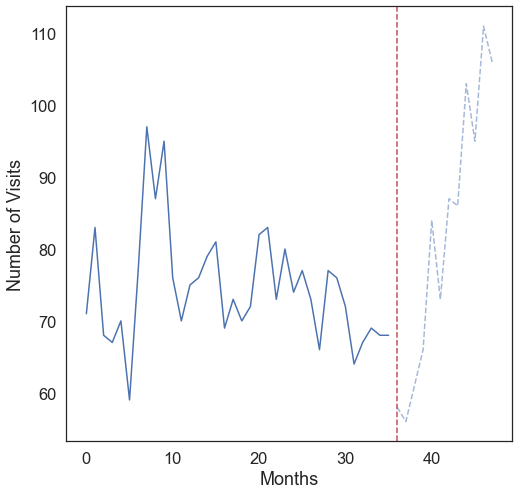

intercept: 33
slope: 0.5546515207387561


In [22]:
from modules.utils.data_utils import generate_poisson_ar_data
from modules.visuals import visualize_time_series
    
process, true_parameters = generate_poisson_ar_data(
    lam_int=50,
    slope_a=5,
    slope_b=5,
    burn_factor=3,
    time_steps=48
)

X = process[:-1]
y = process[1:]

X_tr = X[:-12]
y_tr = y[:-12]

X_ts = X[-12:]
y_ts = y[-12:]

visualize_time_series(
    X=[i for i in range(len(process))], 
    y=process, 
    prediction_point=36, 
    X_label='Months', 
    y_label='Number of Visits',
    figsize=(8, 8)
)
for parameter_name, parameter_value in true_parameters.items():
    
    print(f'{parameter_name}: {parameter_value}')

<center> $y_t \sim Poisson(\lambda_t)$ <center>
<center> $\lambda_t \sim \alpha + \beta y_{t-1}$ <center>  
<center> $\alpha \sim Poisson(\lambda)$ <center>
<center> $\beta \sim Beta(\alpha, \beta)$ <center>

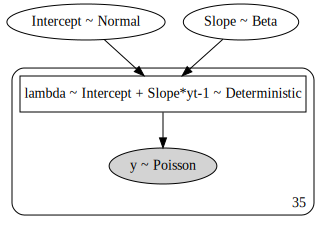

In [23]:
from modules.stats.models.linear_models import PoissonAR1

ar_1_model = PoissonAR1(
    X=X_tr,
    y=y_tr,
    intercept_prior=50,
    slope_prior=(5, 5),
)
ar_1_model.show_plate()

In [24]:
ar_1_model.fit(
    MAP=False, 
    draws=9000, 
    tune=1000,
    chains=2,
    cores=3,
    target_accept=.90
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 3 jobs)
NUTS: [Slope, Intercept]
Sampling 2 chains, 0 divergences: 100%|█████████████████████████████████████| 20000/20000 [00:11<00:00, 1755.61draws/s]


MCMC Estimates

             mean     sd  hpd_3%  hpd_97%  mcse_mean  mcse_sd  ess_mean  \
Intercept  49.888  1.017  48.020   51.806      0.012    0.008    7605.0   
Slope       0.334  0.024   0.289    0.378      0.000    0.000    7099.0   

           ess_sd  ess_bulk  ess_tail  r_hat  
Intercept  7602.0    7605.0    9590.0    1.0  
Slope      7099.0    7101.0    8909.0    1.0  


C:\Users\penthotal\miniconda3\envs\workshop_env\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\penthotal\miniconda3\envs\workshop_env\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\penthotal\miniconda3\envs\workshop_env\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\penthotal\miniconda3\envs\workshop_env\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_k

C:\Users\penthotal\miniconda3\envs\workshop_env\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\penthotal\miniconda3\envs\workshop_env\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\penthotal\miniconda3\envs\workshop_env\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\penthotal\miniconda3\envs\workshop_env\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_k

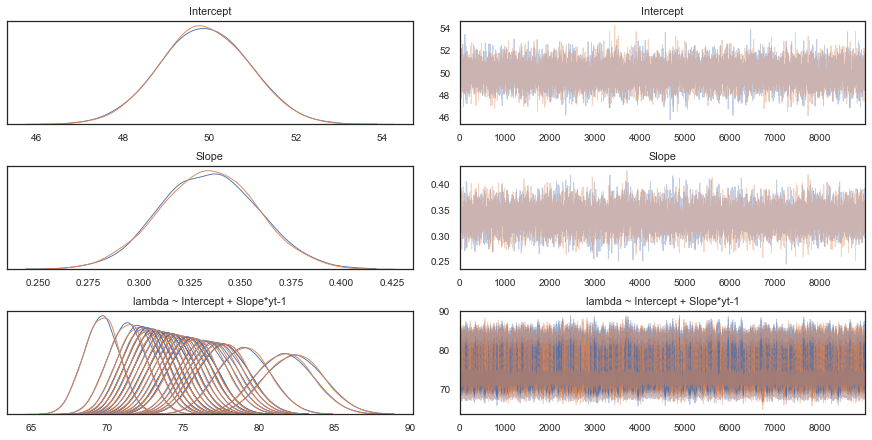

In [25]:
ar_1_model.show_posterior_summary(parameters_name=['Intercept', 'Slope'])

In [26]:
prediction = ar_1_model.predict(X_ts, y_ts, verbose=False)

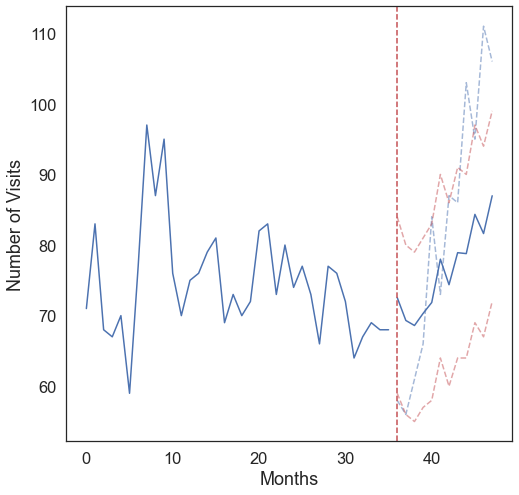

In [27]:
visualize_time_series(
    X=[i for i in range(len(process))], 
    y=process, 
    prediction=prediction['y'], 
    prediction_point=36, 
    X_label='Months', 
    y_label='Number of Visits',
    figsize=(8, 8)
)

In [50]:
prediction = []
x = X_ts[0]
for step in tqdm(range(12)):
    
    posterior_prediction = ar_1_model.predict(x, 1, verbose=False)
    prediction.append(posterior_prediction['y'])
    x = posterior_prediction['y'].mean()

prediction = np.vstack(prediction).T

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [03:03<00:00, 15.28s/it]


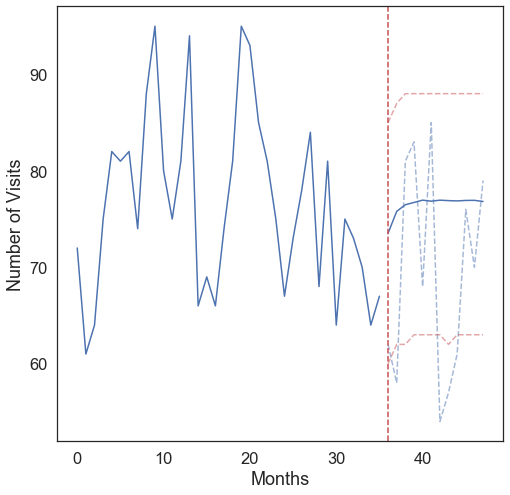

In [51]:
visualize_time_series(
    X=[i for i in range(len(process))], 
    y=process, 
    prediction=prediction, 
    prediction_point=36, 
    X_label='Months', 
    y_label='Number of Visits',
    figsize=(8, 8)
)

### Applied Examples - Game Difficulty and Player Ability Estimation

In [13]:
from modules.utils.data_utils import generate_game_difficulty_data

df, true_parameters = generate_game_difficulty_data(
    players=50,
    levels=40,
    n_sessions=20
)
df.head(10)

,player_id,level,session,num_success,num_attempts
0,0,0,0,2,8
1,0,0,1,3,9
2,0,0,2,1,3
3,0,0,3,2,9
4,0,0,4,0,9
5,0,0,5,3,6
6,0,0,6,1,1
7,0,0,7,2,4
8,0,0,8,2,2
9,0,0,9,2,7


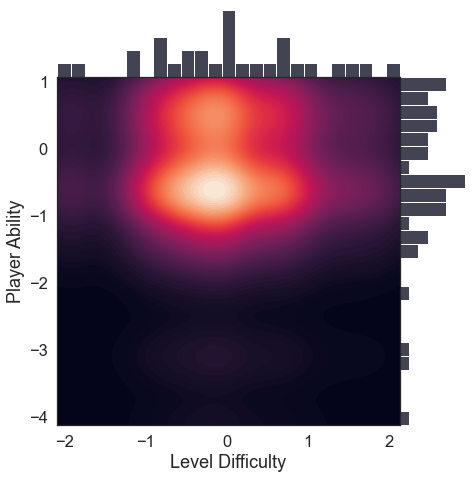

In [14]:
visualize_bivariate_parameter_grid(
    parameter_1=true_parameters['level_difficulty'], 
    parameter_2=true_parameters['player_ability'],
    parameter_1_name='Level Difficulty', 
    parameter_2_name='Player Ability',
    height=7
)

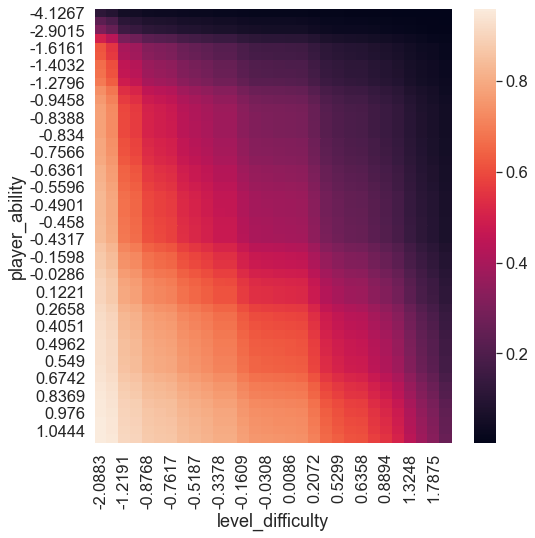

In [15]:
from modules.visuals import visualize_heatmap

visualize_heatmap(
    df=true_parameters, 
    pivot_varaibles=('player_ability', 'level_difficulty', 'probability_success'), 
    rounding=4, 
    figsize=(8, 8),
)

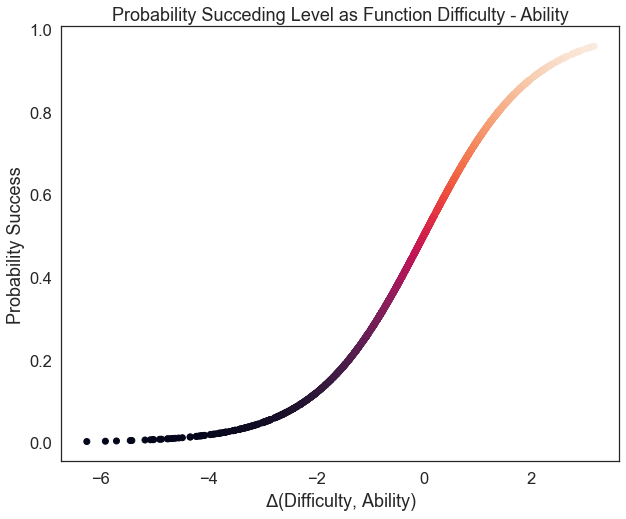

In [16]:
visualize_bivariate_relationship(
    X=true_parameters['delta'],
    y=true_parameters['probability_success'],
    X_label='$\Delta$(Difficulty, Ability)',
    y_label='Probability Success',
    title=f'Probability Succeding Level as Function Difficulty - Ability',
    c=true_parameters['probability_success'],
    cmap='rocket'
)

In [17]:
from modules.stats.models.graphical_models import GameDifficultyModel

PLAYERS_ID = df['player_id'].values
LEVELS_ID = df['level'].values
ATTEMPTS = df['num_attempts'].values
SUCCESSES = df['num_success'].values

game_difficulty_model = GameDifficultyModel(
    players_id=PLAYERS_ID,
    levels_id=LEVELS_ID,
    num_attempts=ATTEMPTS,
    num_success=SUCCESSES
)

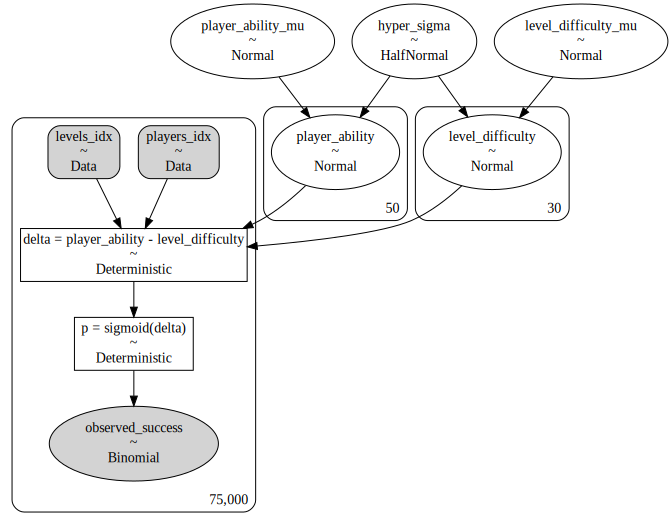

In [18]:
game_difficulty_model.show_plate()

In [29]:
game_difficulty_model.fit(
    MAP=False,
    draws=1000, 
    tune=3000,
    chains=2,
    cores=3,
    target_accept=.90
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 3 jobs)
NUTS: [level_difficulty, player_ability, hyper_sigma, level_difficulty_mu, player_ability_mu]


Sampling 2 chains for 3_000 tune and 1_000 draw iterations (6_000 + 2_000 draws total) took 1956 seconds.
The acceptance probability does not match the target. It is 0.9751188139830751, but should be close to 0.9. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9813837518401645, but should be close to 0.9. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


MCMC Estimates

                      mean     sd  hdi_3%  hdi_97%
player_ability_mu   -0.290  0.314  -0.878    0.256
hyper_sigma          1.079  0.086   0.938    1.257
level_difficulty_mu  0.116  0.303  -0.410    0.673


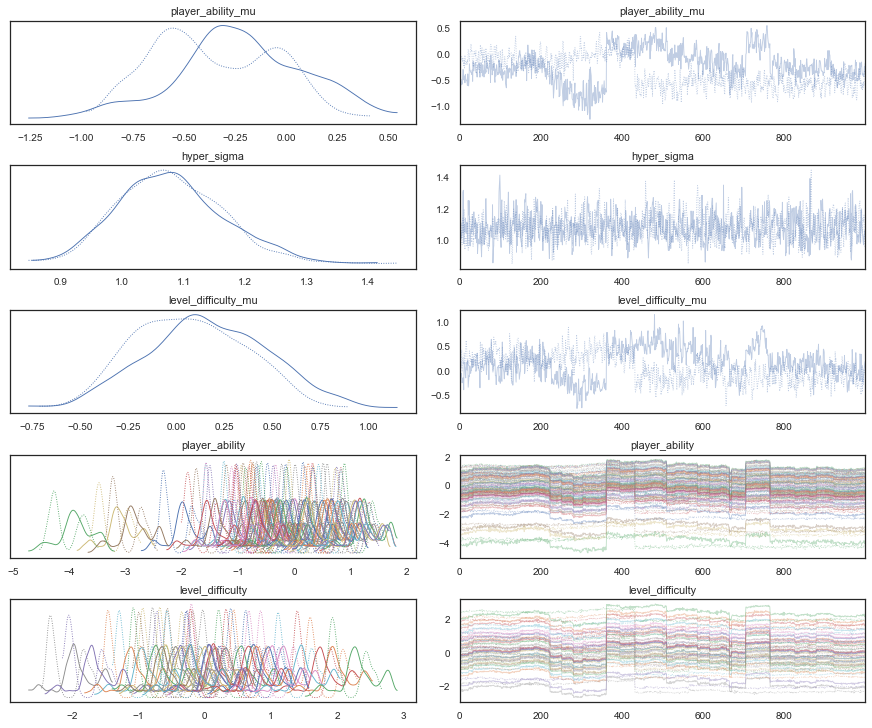

In [30]:
game_difficulty_model.show_posterior_summary(
    parameters_name=[
        'player_ability_mu',
        'hyper_sigma',
        'level_difficulty_mu',
        'player_ability',
        'level_difficulty'
    ],
    compact=True
)

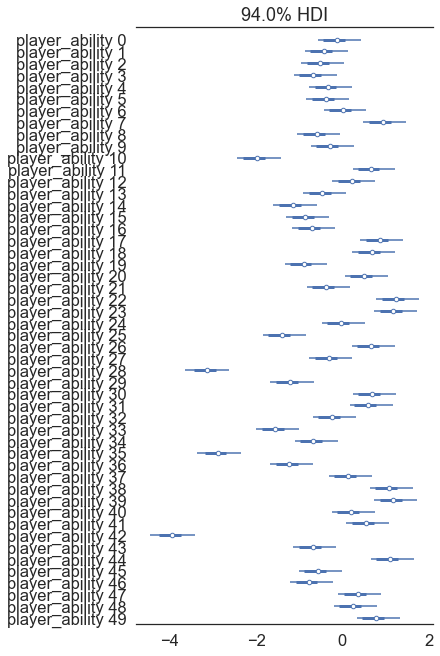

In [31]:
game_difficulty_model.show_forest_plot(
    parameters_name=['player_ability']
)

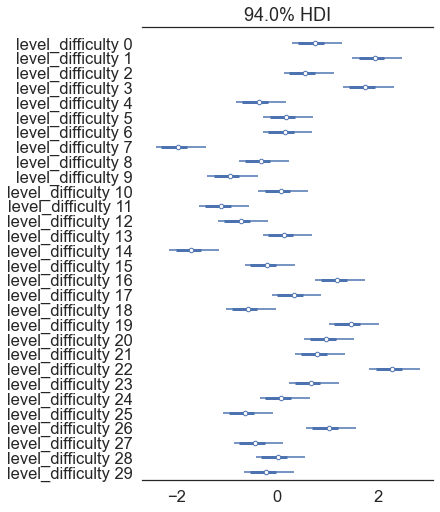

In [32]:
game_difficulty_model.show_forest_plot(
    parameters_name=['level_difficulty']
)

### Applied Examples - Model Comparison

In [33]:
from modules.utils.data_utils import generate_polynomial_data
from modules.stats.models.linear_models import PolynomialRegression


df, true_parameters = generate_polynomial_data(
    X=[i for i in range(100)],
    degree=2,
    noise_ratio=0.1
)

X = df['X'].values
y = df['y'].values

visualize_bivariate_regression(
    X=X,
    y=y,
    X_label='Predictor',
    y_label='Outcome',
    title=f'Quadratic Relationship',
)

NameError: name 'visualize_bivariate_regression' is not defined

In [35]:
models = {
    'Linear': BivariatelRegression(
        intercept_prior=(0, 1),
        slope_prior=(0, 1),
        likelihood_sigma_prior=1,
        X=X,
        y=y
    ),
    'Quadratic': PolynomialRegression(
        X=X,
        y=y,
        cubic=False
    ),
    'Cubic': PolynomialRegression(
        X=X,
        y=y,
        cubic=True
    )
} 
for name, model in models.items():
    
    print(f'Sampling from {name}')
    model.fit(
        MAP=False, 
        draws=1000, 
        tune=1000,
        chains=2,
        cores=1,
        target_accept=.90,
        init='adapt_diag'
    )

NameError: name 'BivariatelRegression' is not defined

In [212]:
df_results = pm.compare(
    {name: model.get_traces() for name, model in models.items()},
    ic='loo',
    scale='log'
)
df_results

C:\Users\valeriob\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\stats\stats.py:151: UserWarning: 
The scale is now log by default. Use 'scale' argument or 'stats.ic_scale' rcParam if you rely on a specific value.
A higher log-score (or a lower deviance) indicates a model with better predictive accuracy.
  "\nThe scale is now log by default. Use 'scale' argument or "
C:\Users\valeriob\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
C:\Users\valeriob\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Ma

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Quadratic,0,99.8286,4.21359,0,0.765704,7.54131,0,False,log
Cubic,1,98.6319,5.46029,1.19674,0.234296,6.36658,0.220697,False,log
Linear,2,-6.26655,3.25146,106.095,1.38875e-36,7.46115,8.35353,False,log


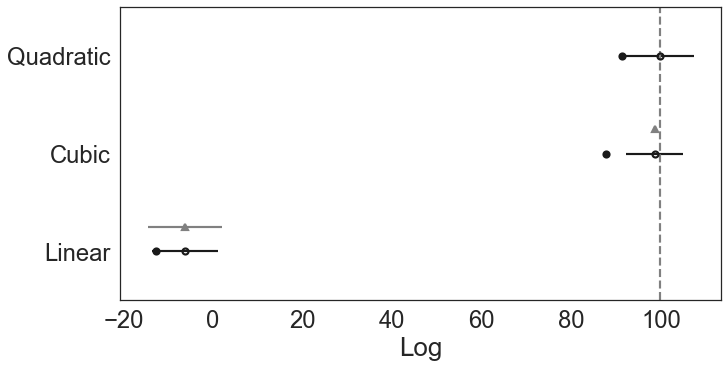

In [213]:
pm.plot_compare(
    df_results,
    figsize=(10, 5)
)